## I Have run this code on collab with GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/My Drive/data/"

Please download the dataset from the below url:
https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue
Dataset credit: Akash Zade
(delete test data comp files folder in test folder)

Code inspiration: Krish Naik

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = path+'train'
valid_path = path+'test'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob(path+'train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(path+'train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory(path+'test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 583s 9s/step - loss: 3.2204 - accuracy: 0.6263 - val_loss: 1.8330 - val_accuracy: 0.6667
Epoch 2/20
61/61 [==============================] - 33s 534ms/step - loss: 0.7569 - accuracy: 0.8831 - val_loss: 1.0736 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 32s 530ms/step - loss: 0.7756 - accuracy: 0.8729 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 32s 529ms/step - loss: 0.5932 - accuracy: 0.9076 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 32s 529ms/step - loss: 0.2812 - accuracy: 0.9491 - val_loss: 0.6449 - val_accuracy: 0.8333
Epoch 6/20
61/61 [==============================] - 33s 532ms/step - loss: 0.5203 - accuracy: 0.9274 - val_loss: 0.8016 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 33s 534ms/step - loss: 0.3753 - accuracy: 0.9342 - val_loss: 0.1160 - val_accuracy: 0.9444
E

In [18]:
import matplotlib.pyplot as plt

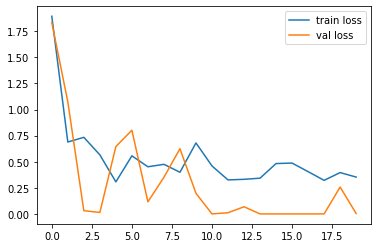

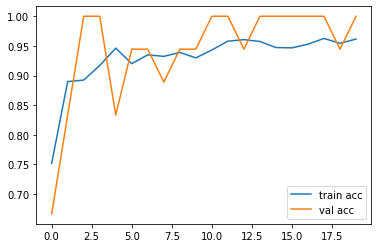

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
# save it as a h5 file

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
path1="/content/drive/MyDrive/Colab Notebooks/Cotton-Disease-Prediction-Transfer-Learning/"
model.save(path1+'model_inception.h5')

In [49]:

loaded_model=load_model(path1+'model_inception.h5')
y_pred1 = loaded_model.predict(test_set)

In [50]:
y_pred1 = np.argmax(y_pred1, axis=1)


In [51]:
print(y_pred1)

[3 0 2 3 1 2 2 1 0 1 3 0 3 1 2 1 2 3]
